# CALCULO INTEGRAL E DIFERENCIAL#

## LIMITES DE UMA FUNÇÃO##

+ #### LIMITE SIMBÓLICO BÁSICO####

In [163]:
using SymPy

@vars x y

(x,y)

In [2]:
SymPy.limit((x-1)^2 / (x-1), x,1 ) 

0

Ou ainda

In [3]:
f(x) = (x-1)^2 / (x-1)

f (generic function with 1 method)

In [4]:
SymPy.limit(f(x), x,1 ) 

0

In [5]:
f(x,y) = x*y-2*x+y

f (generic function with 2 methods)

In [6]:
SymPy.limit(limit(f(x,y),x,1),y,1)

0

+ #### LIMITE SIMBÓLICO INFINITO####

In [7]:
SymPy.limit(1/x^2,x,oo)

0

In [8]:
SymPy.limit(1/x^2,x,0)

oo

+ #### LIMITE NUMÉRICO####

In [9]:
f(x) = (x-1)^2/(x+1)

f(x)

       2
(x - 1) 
--------
 x + 1  

In [20]:
hs = [10.0^(-i) for i in 1:10]

ys = [f(h) for h in hs]

[hs ys]

10x2 Array{Any,2}:
 0.1      0.736364
 0.01     0.970396
 0.001    0.997004
 0.0001   0.9997  
 1.0e-5   0.99997 
 1.0e-6   0.999997
 1.0e-7   1.0     
 1.0e-8   1.0     
 1.0e-9   1.0     
 1.0e-10  1.0     

## DERIVADA DE UMA FUNÇÃO##

+ ### DERIVADA SIMBÓLICA INDEFINIDA###

In [164]:
using SymPy

@vars x

(x,)

In [12]:
f(x) = x^2+3*x

f (generic function with 2 methods)

In [13]:
# Primeira derivada

diff(f(x),x,1)

2*x + 3

In [14]:
der = Derivative(f(x))

d / 2      \
--\x  + 3*x/
dx          

In [15]:
doit(der)

2*x + 3

In [16]:
# Segunda derivada

diff(f(x),x,2)

2

In [17]:
# Terceira derivada

diff(f(x),x,3)

0

+ ### DERIVADA SIMBÓLICA DEFINIDA ###

In [18]:
f(x) = sin(x)*x; f(x)

x*sin(x)

In [19]:
# primeira derivada

dy = diff(f(x),x,1)

x*cos(x) + sin(x)

In [20]:
# substituindo x por 2

float(SymPy.subs(dy,x,2)) 

0.07700375373139692

Ou mais compacto ainda

In [21]:
# primeira derivada e substituição de x por 2

float(SymPy.subs(diff(f(x),x,1),x,2))

0.07700375373139692

+ ### DERIVADA NUMÉRICA###

Julia não implementa uma função nativa para derivadas numéricas. A saída é utilizar a função eval para a definição de limites ou usar o pacote **Calculus**

df(x) =  limit a -> b = ( f(a) - f(b) )/ (a-b)

In [115]:
# Limite pela esquerda

x = 1.999999

d1 = eval((sin(x)*x - sin(2)*2)/(x-2));

d2 = (sin(x)*x - sin(2)*2)/(x-2);

print(d1,d2)

0.077005079208387630.07700507920838763

In [117]:
# Limite pela direita

x = 2.0000001

d1 = eval((sin(x)*x - sin(2)*2)/(x-2));

d2 = (sin(x)*x - sin(2)*2)/(x-2);

print(d1,d2)

0.077003621383199240.07700362138319924

#### PACOTE CALCULUS ####

In [92]:
using Calculus

In [107]:
f_n(x) = sin(x)*x

f_n (generic function with 1 method)

In [110]:
f_n'(2.0)

0.07700375369374567

In [111]:
f_n''(2.0)

-2.650888509808393

+ ### DERIVADA PARCIAL###

In [166]:
@vars x y

(x,y)

In [25]:
fxy =  x*y + x^2 -2*y

 2            
x  + x*y - 2*y

In [26]:
# Primeira Derivada parcial em relação a variável x

DyDx = diff(fxy,x,1);

DyDx

2*x + y

In [27]:
# Testando para x = 0 e y = 1

DyDx(0,1) 

1

In [28]:
# Primeira derivada parcial em relação a variável y

DyDx = diff(fxy,y,1);
DyDx

x - 2

In [29]:
# Testando para x = 0 e y = 1

DyDx(0,1)

-2

## INTEGRAL DE UMA FUNÇÃO##

+ ### INTEGRAL SIMBÓLICA INDEFINIDA###

In [167]:
using SymPy

@vars x y

(x,y)

In [26]:
fint = sin(x)*x

x*sin(x)

In [27]:
SymPy.integrate(fint,x)

-x*cos(x) + sin(x)

Uma forma de escrever a integral e resolver

In [29]:
integ = Integral(fint, (x))

  /           
 |            
 | x*sin(x) dx
 |            
/             

In [30]:
# resolver a integral

doit(integ)

-x*cos(x) + sin(x)

+ ### INTEGRAL SIMBÓLICA DEFINIDA###

In [31]:
fint = sin(x)*x

x*sin(x)

In [33]:
# f(x) = sin(x)*x

SymPy.integrate(fint,x,0,1)

-cos(1) + sin(1)

In [34]:
# f(x) = sin(x)*x

float(SymPy.integrate(fint,x,0,1))

0.3011686789397568

Uma forma de escrever a integral e resolver

In [35]:
integ = Integral(fint, (x,0,1))

  1            
  /            
 |             
 |  x*sin(x) dx
 |             
/              
0              

In [36]:
# resolver a integral

doit(integ)

-cos(1) + sin(1)

In [37]:
float(doit(integ))

0.3011686789397568

+ ### INTEGRAL NUMÉRICA###

#### USANDO A FUNÇÃO QUADGK ####

integração Numérica baseada na quadratura Gaussiana.Sintaxe:

**quadgk(funcao,limite_inferior,limite_superior)**

Para a função $f(x) = x^2 - sin(x)$ Use **quadgk(f,0,1)**. Se usar **quadgk( f(x) ,0,1 )** sem o SymPy ocorrerá erro. O resultado é um vetor na forma [valor, erro] e pode ser acessado separadamente quando é atribuído a uma variável.

Ex: valor = quadgk(f,0,1)

valor[1] ou valor[2]

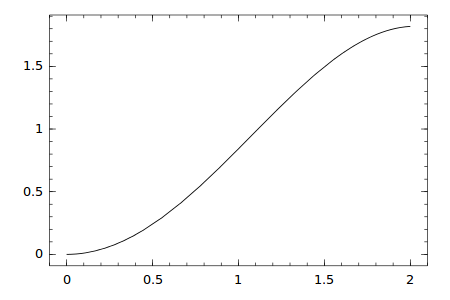

In [99]:
using Winston

Winston.plot(x -> sin(x)*x,0,2)

In [57]:
fnum1(x) = sin(x)*x

fnum1 (generic function with 1 method)

In [58]:
quadgk(fnum1,0,1)

(0.3011686789397568,0.0)

Utilizando uma função anônima

In [59]:
quadgk(x->sin(x)*x,0,1)

(0.3011686789397568,0.0)

#### USANDO O PACOTE CUBATURE ####

(valr,erro) = hquadrature(f::Function, xmin::Real, xmax::Real;reltol=1e-8, abstol=0, maxevals=0)

In [60]:
using Cubature

In [85]:
fnum2(x) = sin(x)*x

fnum2 (generic function with 1 method)

In [88]:
hquadrature(fnum2,0,1)

(0.3011686789397568,3.3436440165485948e-15)

Utilizando uma função anônima

In [63]:
hquadrature(x->sin(x)*x,0,1)

(0.3011686789397568,3.3436440165485948e-15)

#### FUNÇÃO GENÉRICA "SOMA DE RIEMANN" DE VÁRIOS METODOS DE INTEGRAÇÃO NUMÉRICA####

Em 1854 Riemann foi o primeiro a dar uma definição rigorosa do integral de uma função contínua em um intervalo fechado. A soma de Riemann é um dos métodos mais simples de compreender as aproximações para a área sob uma curva. A ideia básica é que o intervalo [a,b] é particionado através de pontos a = $x_0 <x_1 < ... x_n = b$ e a área sob f(x) entre $ x_{i}\, $ e $ x_{i + 1} \, $ é aproximado por um retângulo com o f base de $x_{i+1} - x_i\, $ e altura dada por $f(x_i^*)\, $, onde $x_i^*$  é algum ponto no intervalo $[x_i, x_{i + 1}] $. Opções típicas são o ponto de  esquerda ou o ponto de direita do intervalo, ou o valor $x$ que minimiza ou maximiza a função $f(x)$ sobre o intervalo. A figura mostra estas quatro opções para alguma função amostra.
![](soma_riemann.gif)
** riemann(f::Function, a::Real, b::Real, n::Int; metodo = "direita")**

    Function -> Função
    a,b      -> intervalos
    n        -> Quantidade de subintervalos

In [153]:
function riemann(f::Function, a::Real, b::Real, n::Int; metodo = "direita")
  if metodo == "direita"
     met(f,l,r) = f(r) * (r-l)
        
  elseif metodo == "esquerda"
     met(f,l,r) = f(l) * (r-l)
        
  elseif metodo == "trapez"
     met(f,l,r) = (1/2) * (f(l) + f(r)) * (r-l)
        
  elseif metodo == "simp"
     met(f,l,r) = (1/6) * (f(l) + 4*(f((l+r)/2)) + f(r)) * (r-l)
  end

  xs = a + (0:n) * (b-a)/n
  as = [met(f, l, r) for (l,r) in zip(xs[1:end-1], xs[2:end])]
    
  sum(as)
end

riemann (generic function with 1 method)

In [154]:
f(x) =  sin(x)*x

f (generic function with 1 method)

In [161]:
riemann(f, 0, 1, 10000)

0.30121075364044186

In [158]:
riemann(f, 0, 1, 10000, metodo = "esquerda")

0.3011266065419611

In [159]:
riemann(f, 0, 1, 10000, metodo = "simp")

0.3011686789397237

+ ### INTEGRAL IMPRÓPRIA###

In [46]:
using SymPy

@vars x

x

In [40]:
fimp = 1/(1+x^2)

  1   
------
 2    
x  + 1

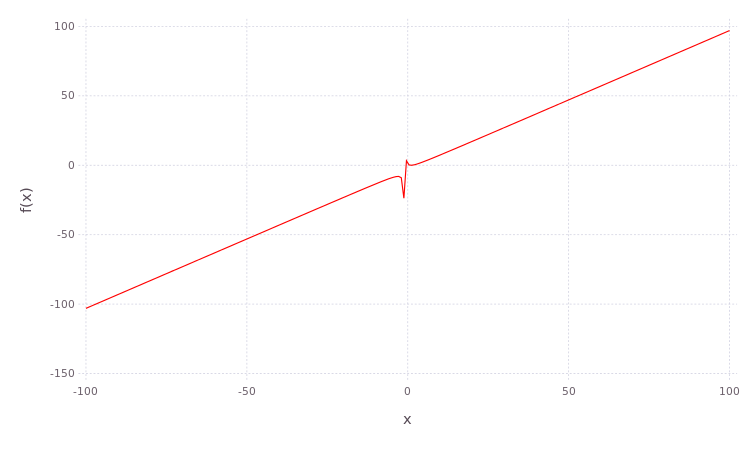

In [41]:
using Gadfly

set_default_plot_size(20cm, 12cm)

Gadfly.plot(
[x->f(x)], -100, 100,
Theme(default_color=colorant"red"),
Scale.x_continuous(minvalue=-100, maxvalue=100),
Scale.y_continuous(minvalue=0, maxvalue=1)
)

In [42]:
SymPy.integrate(fimp,x,0,+oo)

pi
--
2 

In [43]:
SymPy.integrate(fimp,x,-oo,+oo)

pi

+ ### INTEGRAÇÃO NUMÉRICA###

**f(x) = 1/(1+x^2)**. Use **quadgk(f ,0 ,10^20 )**. Se usar **quadgk( f(x), 0, 10^20 )** sem o SymPy vai dar erro o resultado é um vetor na forma [valor, erro] e pode ser acessado separadamente quando é atribuído a uma variável.

Ex: a = quadgk(f,0,10^20);

a[1] ou a[2]


In [119]:
f(x) = 1/(1+x^2)

f (generic function with 1 method)

In [120]:
quadgk(f,0,10^20)

(1.5707963267948963,1.1687668713390112e-10)

In [121]:
quadgk(f,-10^20,10^10)

(3.1415926534986807,4.3322244545763313e-8)

+ ### INTEGRAÇÃO MULTIPLA ###

** Integral Multipla Simbólica Indefinida **

In [168]:
using SymPy

@vars x y

(x,y)

** Integral Dupla Indefinida **

In [169]:
f_di = x*y-x+y;
f_di

x*y - x + y

$ \int \int {f(x,y)} ~dxdy $

In [170]:
int_dupla = SymPy.integrate(SymPy.integrate(f_di,x),y)

   2        / 2    \
  x *y    2 |x    x|
- ---- + y *|-- + -|
   2        \4    2/

Ou colocando direto a função no comando

In [171]:
int_dupla = SymPy.integrate(SymPy.integrate(x*y-x+y,y),x)

   / 2    \      2
 2 |y    y|   x*y 
x *|-- - -| + ----
   \4    2/    2  

Ou ainda mais facil

In [49]:
SymPy.integrate(f_di, (x), (y))

   2        / 2    \
  x *y    2 |x    x|
- ---- + y *|-- + -|
   2        \4    2/

** Integral Tripla Indefinida **

In [173]:
using SymPy;

@vars x y z

(x,y,z)

In [52]:
f_ti = x*y*z-x+y-z;
f_ti

x*y*z - x + y - z

$ \int \int \int {f(x,y)} ~dxdydz $

In [53]:
int_tripla_a = SymPy.integrate(SymPy.integrate(SymPy.integrate(x*y-x+y,x),y),z)

  /   2        / 2    \\
  |  x *y    2 |x    x||
z*|- ---- + y *|-- + -||
  \   2        \4    2//

In [54]:
SymPy.simplify(int_tripla_a)

x*y*z*(x*y - 2*x + 2*y)
-----------------------
           4           

In [56]:
int_tripla_b = SymPy.integrate(f_ti, (x), (y), (z))

   2 /y*z   1\                2 /y*z   1\            
- y *|--- - -| - y*(y - z) + z *|--- - -| + z*(y - z)
     \ 2    2/                  \ 2    2/            

In [63]:
SymPy.simplify(int_tripla_b)

   3      2      3              2
  y *z   y    y*z            3*z 
- ---- - -- + ---- + 2*y*z - ----
   2     2     2              2  

In [64]:
int_tripla_a == int_tripla_b

false

** Integral Multipla Simbólica Definida **

In [65]:
using SymPy;

x,y= Sym("x,y")

(x,y)

** Integral Multipla Dupla Definida **

In [57]:
f_si = x*y-x+y;
f_si

x*y - x + y

$ \int_{y-1}^{y+1} \int_{x-1}^{x+1} {f(x,y)} ~dxdy $

In [58]:
int_dupla = SymPy.integrate(SymPy.integrate(f_si,x,x-1,x+1),y,y-1,y+1)

                                           2                  2
2*x*(y - 1) - 2*x*(y + 1) - (x + 1)*(y - 1)  + (x + 1)*(y + 1) 

Outro exemplo: 

$ \int_{0}^{1} \int_{0}^{1} {f(x,y)} ~dxdy $

In [59]:
int_dupla = SymPy.integrate(SymPy.integrate(f_si,x,0,1),y,0,1)

1/4

Ou ainda mais prático

In [60]:
SymPy.integrate(f_si, (x, 0, 1), (y, 0, 1))

1/4

** Integral Multipla Tripla Definida **

In [174]:
using SymPy

@vars x y z

(x,y,z)

In [62]:
f_td = x*y*z-x+y-z;
f_td

x*y*z - x + y - z

$ \int_{0}^{1} \int_{y-1}^{y+1} \int_{x-1}^{x+1} {f(x,y)} ~dxdydz $

In [63]:
int_tripla = SymPy.integrate(SymPy.integrate(SymPy.integrate(f_td,x,x-1,x+1),y,y-1,y+1),z,0,1)

2*x*y - 4*x + 4*y - 2

Ou ainda mais prático

In [64]:
SymPy.integrate(f_td, (x, x-1 , x+1 ), (y, y-1 , y+1 ),(z, 0, 1))

2*x*y - 4*x + 4*y - 2

Outro exemplo

In [65]:
f_td2 = x*y*z-x+y-z;
f_td2

x*y*z - x + y - z

$\int \int \int {f(x,y)} ~dxdydz $

In [66]:
int_tripla = SymPy.integrate(SymPy.integrate(SymPy.integrate(f_td2,x,0,1),y,0,1),z,0,1);
float(int_tripla)

-0.375

Ou ainda mais prático

In [67]:
integrate(f_td2, (x, 0, 1), (y, 0, 1),(z,0,1))

-3/8

+ ### INTEGRAL MULTIPLA NUMÉRICA###

$\int_{y_{min}}^{y_{max}} \int_{x_{min}}^{x_{max}} f(x,y)\, dxdy$

#### INTEGRAL MULTIPLA DUPLA NUMÉRICA####

Vamos utilizar o pacote Cubature. Forma:

**(resultado, erro) = hcubature(funcao(x,y,z), [x_inf,y_inf], [x_sup,y_sup])**

$\int_{0}^{1} \int_{0}^{1} xy - x + y\, dxdy$

In [6]:
using Cubature

In [38]:
f_dn(x) = x[1]*x[2] - x[1] + x[2]

f_dn (generic function with 1 method)

In [39]:
hcubature(f_dn, [0,0], [1,1]) 

(0.25,0.0)

#### INTEGRAL TRIPLA NUMÉRICA ####

$\int_{z_{min}}^{z_{max}} \int_{y_{min}}^{y_{max}} \int_{x_{min}}^{x_{max}} f(x,y,z)\, dxdydzb$

Vamos utilizar o pacote Cubature. Forma:

**(resultado, erro) = hcubature(funcao(x,y,z), [x_inf,y_inf,z_inf], [x_sup,y_sup,z_sup])**

In [185]:
using Cubature

In [186]:
f_tn(x) = x[1]*x[2]*x[3] - x[1] + x[2] + x[3]

f_tn (generic function with 1 method)

In [187]:
hcubature(f_tn, [0,0,0], [1,1,1]) 

(0.6249999999999999,1.1102230246251565e-16)

In [46]:
a = [5 0.25 2.7 -1;8 -7 1 -2;7.8 -9 -2 2.4]

3x4 Array{Float64,2}:
 5.0   0.25   2.7  -1.0
 8.0  -7.0    1.0  -2.0
 7.8  -9.0   -2.0   2.4

%%% Fim Calculo Diferencial e Integral %%%